In [3]:
import os
import re
import nltk
import itertools
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [2]:
# Loading Data
data = pd.read_table('../data/IMDB_reviews.tsv')
data.head(10)

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...
5,8196_8,1,I dont know why people think this is such a ba...
6,7166_2,0,"This movie could have been very good, but come..."
7,10633_1,0,I watched this video at a friend's house. I'm ...
8,319_1,0,"A friend of mine bought this film for £1, and ..."
9,8713_10,1,<br /><br />This movie is full of references. ...


In [3]:
# Counting unique words
reviews = data['review'].tolist()

words = list(map(lambda x: re.findall(r'\w+', x), reviews))
all_words = list(itertools.chain.from_iterable(map(lambda x: re.findall(r'\w+', x), reviews)))
unique_words = set(all_words)

print("All words = ", len(all_words))
print("Unique words = ", len(unique_words))

All words =  6056873
Unique words =  93929


In [5]:
reviews_array = np.array(sentences).reshape(reviews_amount, 1)
sentiment_array = data['sentiment'].as_matrix().reshape((25000, 1))

In [6]:
dataset = np.hstack((sentiment_array, reviews_array))

In [7]:
print("Shape = ", dataset.shape)

Shape =  (25000, 2)


In [4]:
dataset = np.load('dataset.np.npy')

In [6]:
X = vectorizer.fit_transform(dataset.T[1].astype(np.unicode).reshape((25000,)).tolist())

In [7]:
print("Shape =", X.shape)

Shape = (25000, 74325)


In [10]:
coX = (X.T * X).astype(np.int32)
diag = coX.diagonal()
coX.setdiag(0)

In [11]:
from scipy.sparse.linalg import svds
sparce_svd = svds(coX.asfptype(), k=2)

In [18]:
u, s, v = sparce_svd
top_words = np.argsort(diag)[-20:][::-1].tolist()

In [19]:
for i in top_words:
    print(vectorizer.get_feature_names()[i], " - ", diag[i])

show  -  21849
bad  -  21654
people  -  19847
great  -  17778
first  -  17764
much  -  17326
get  -  16625
films  -  15157
movies  -  14954
character  -  14276
love  -  14019
life  -  13812
made  -  13640
characters  -  13599
way  -  13550
could  -  13228
make  -  13087
two  -  12964
think  -  12719
best  -  11208


In [22]:
import matplotlib.pyplot as plt

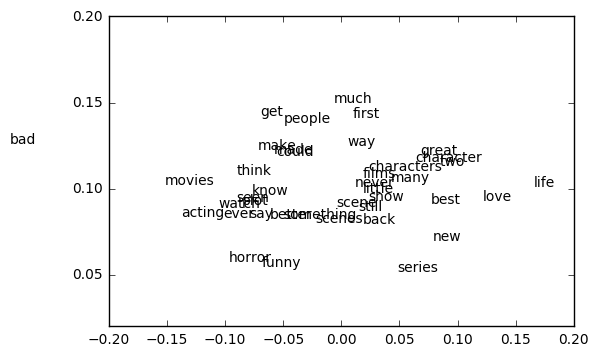

In [38]:
for i in max20idx:
    plt.text(u[i][0], u[i][1], vectorizer.get_feature_names()[i])
plt.axis([-0.2, 0.2, 0.02, 0.2])
plt.show()